<a href="https://colab.research.google.com/github/FelipeSanchez90613/Laboratorios/blob/main/Actividad3-cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cars price prediction
Luis Felipe Sanchez Sanchez - 90613

Harold Shneider Martinez Tapiero - 77999



The objective of this jupyter notebook is to train a machine learning algorithm to predict a car's price, based on known characteristics. The training data was obtained by web scraping, using Selenium and Beautiful Soap from tucarro.com.co; This project has no commercial purposes its for merely academic endeavor.
_Updated: June 22th, 2024_

## Data understanding

### Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load data

In [5]:
cols = ['model','price','year','kms','color','fueltype']
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Taller 2/usedCarsCol_picanto_200624.csv', sep=',', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()


(528, 6)


,model,price,year,kms,color,fueltype
0,Kia Picanto 1.2 Zenith,$49.900.000,2022,19.0,Blanco,Gasolina
1,Kia Picanto Zenith,$58.990.000,2024,0.0,Rojo,Gasolina
2,Kia Picanto Gt Line Modelo 2025 Entrega Inmedi...,$70.990.000,2025,0.0,Blanco,Gasolina
3,Kia Picanto Vibrant Modelo 2025 Entrega Inmedi...,$54.990.000,2025,0.0,Plateado,Gasolina
4,Kia Picanto 1.25 Ion Xtrem,$33.900.000,2014,142.7,Gris,Gasolina


### Verify data types

In [6]:
data.dtypes

model        object
price        object
year          int64
kms         float64
color        object
fueltype     object
dtype: object

### Count unique values for each variable

In [7]:
data.nunique()

model       152
price       210
year         20
kms         339
color        12
fueltype      2
dtype: int64

In [8]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Kia Picanto 1.2 Zenith', 'Kia Picanto Zenith', 'Kia Picanto Gt Line Modelo 2025 Entrega Inmediata ', 'Kia Picanto Vibrant Modelo 2025 Entrega Inmediata ', 'Kia Picanto 1.25 Ion Xtrem', 'Kia Picanto ion 1.25', 'Kia Picanto Emotion', 'Kia Picanto 1.2 X-Line At', 'Kia Picanto Vibrant Modelo 2025 Entrega Inmedita', 'Kia Picanto 1.2 Vibrant Mecanico', 'Kia Picanto 1.25 Ion R Summa', 'Kia Picanto Mt 2024', 'Kia Picanto At 1.2 2013', 'Kia Picanto 1.25 Vibrant', 'Kia Picanto 1.2 Vibrant', 'Kia Picanto Vibrant 1250cc Mt Aa ', 'Kia Picanto 1.25', 'Kia Picanto 1.25 Ion R', 'Kia Picanto 1.0 66 hp', 'Kia Picanto Zenith AT', 'Kia Picanto 1.1 Morning', 'Kia Picanto 1.0 Ion', 'Taxi Kia Picanto 1.0', 'Kia Picanto Summa 1250cc Mt Aa', 'Kia Picanto VIBRANT', 'Kia Picanto Ex Ion R', 'Kia Picanto Zenith Mecanico', 'Kia Picanto 1.2 Zenith At', 'Kia Picanto Lx No Tiene Aire, 1.0 Mt', 'Kia Picanto ZENITH', 'Kia Picanto Ekotaxi 2025', 'Kia Picanto Grand Ekotaxi 2022 1000cc', 'Kia Picanto Ion Xtrem 1.250cc m/

### Data transformation

In [9]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(528, 5)

#### Transform $price$ to numerical

In [10]:
datacc['price'] = datacc['price'].str.replace(r'[$.]', '', regex=True).astype(int)

##### Transform $kms$ to numerical

In [11]:
# Convert 'kms' column to string type before applying str.replace
datacc['kms'] = datacc['kms'].astype(str).str.replace(r'[.]', '',regex=True).astype(int)

In [12]:
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [13]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

##### Transform categorical variables to dummies: $year$ and $fuel type$

In [14]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [15]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,49900000,2022,190,2,0
1,58990000,2024,0,10,0
2,70990000,2025,0,2,0
3,54990000,2025,0,9,0
4,33900000,2014,1427,5,0


## Data Exploration

In [16]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,5.280000e+02,528.000000,528.000000
mean,4.715853e+07,2018.395833,10464.962121
std,2.048630e+07,4.274782,39560.106444
min,1.450000e+07,2006.000000,0.000000
25%,3.500000e+07,2015.000000,319.000000
50%,4.350000e+07,2019.000000,771.000000
75%,5.090000e+07,2022.000000,1601.250000
max,1.359000e+08,2025.000000,579241.000000


#### Histograms

Text(0.5, 1.0, '$kms$')

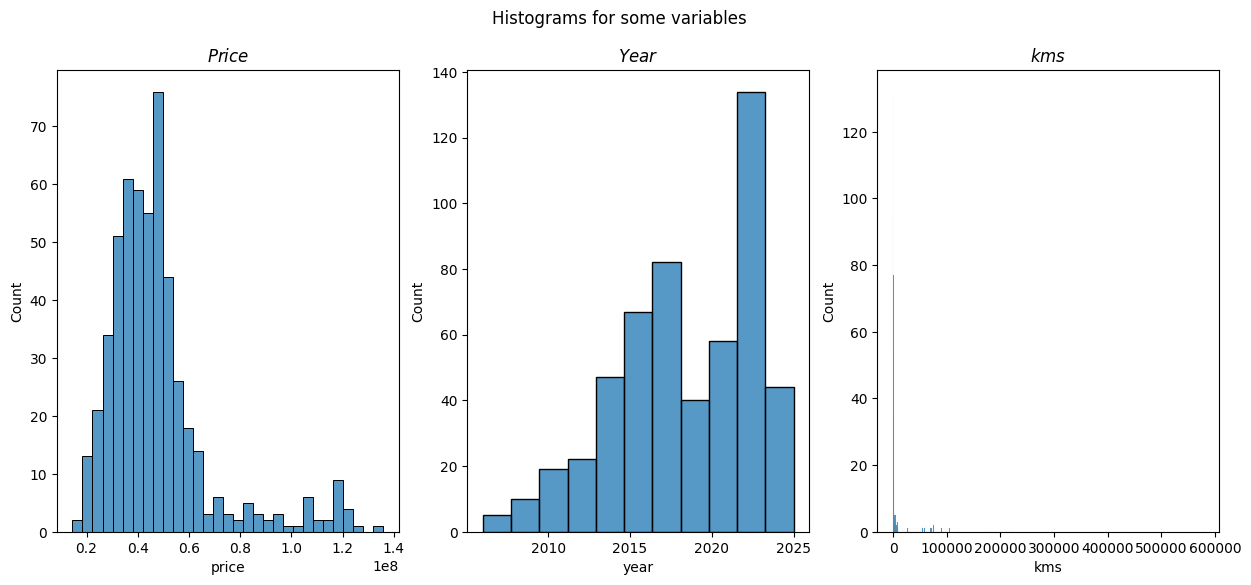

In [17]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

#### Boxplots

<Axes: >

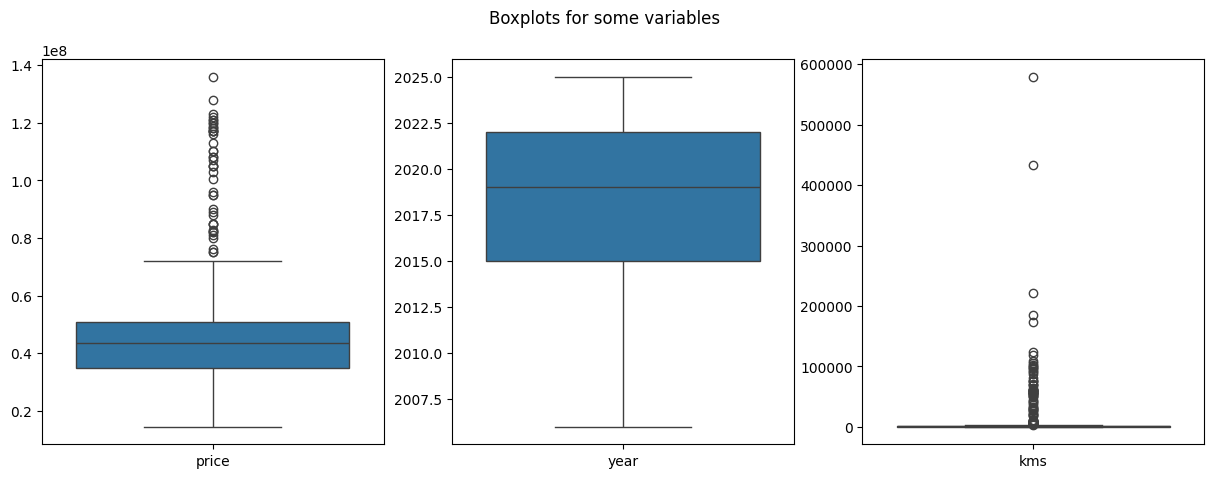

In [18]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

<Axes: >

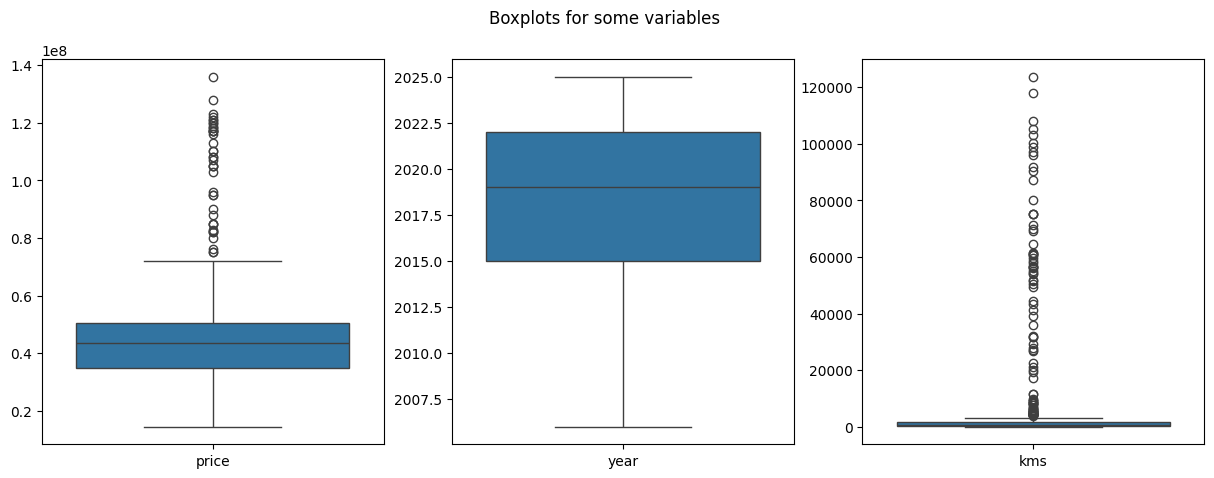

In [19]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>3)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

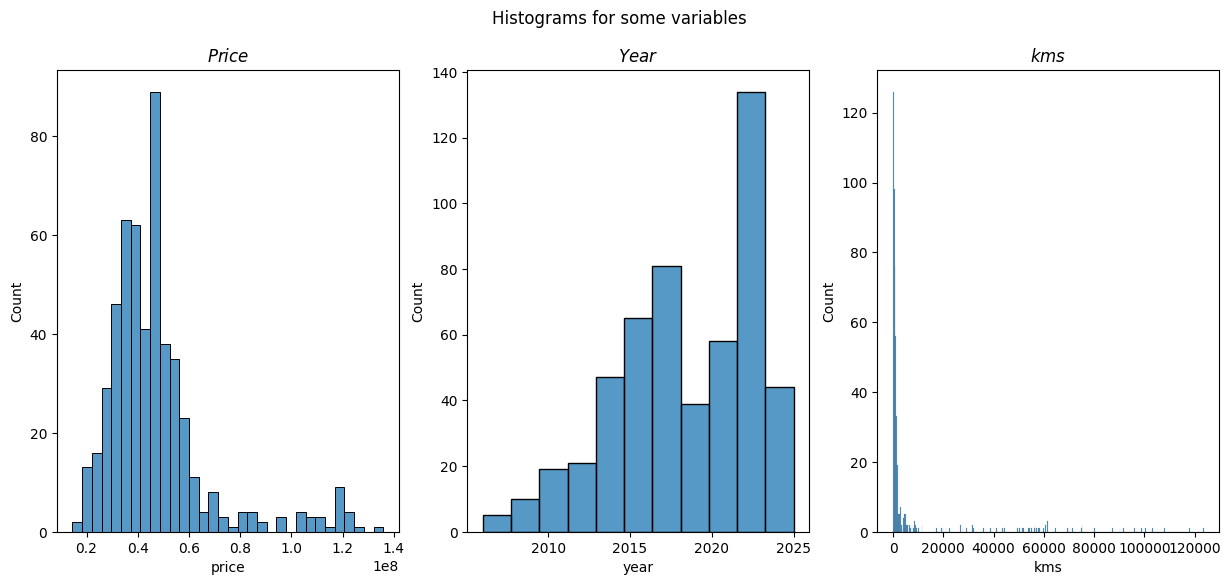

In [20]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

##Pruebas

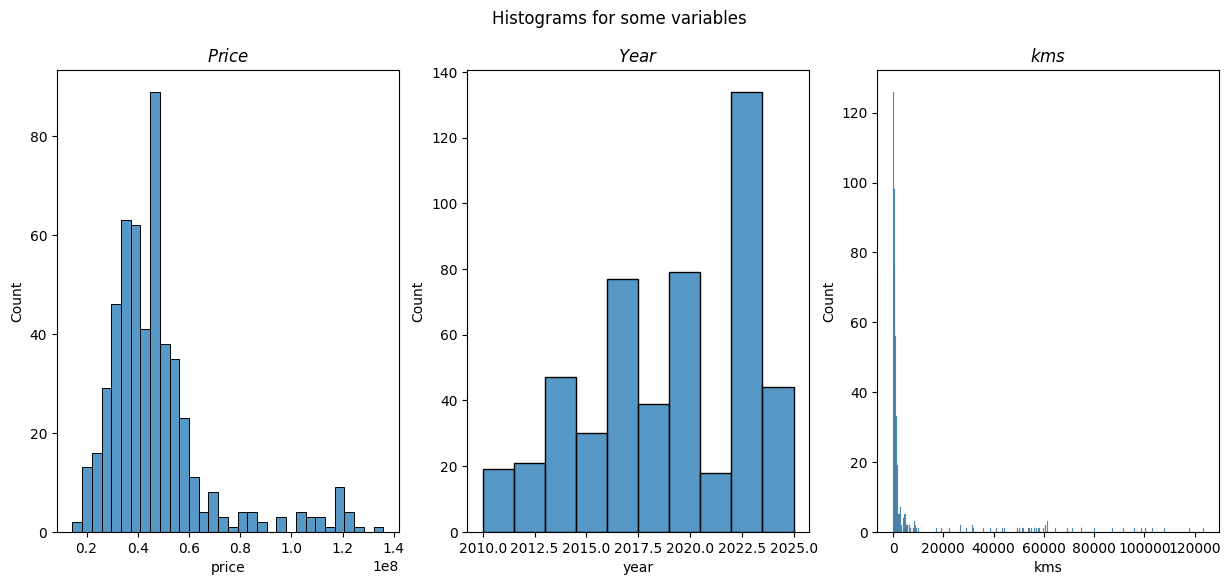

In [21]:
#filtración por año
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'datacc' es tu DataFrame donde tienes las variables 'price', 'year' y 'kms'

# Filtro para los datos de 'year' entre 2010 y 2025
filtered_data = datacc[(datacc['year'] >= 2010) & (datacc['year'] <= 2025)]

# Histogramas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Histograms for some variables')

# Histograma para 'price'
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')

# Histograma para 'year' con filtro
sns.histplot(filtered_data['year'], ax=ax2)
ax2.set_title('$Year$')

# Histograma para 'kms'
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

plt.show()

### EDA (Exploratory Data Analysis)

#### Correlations

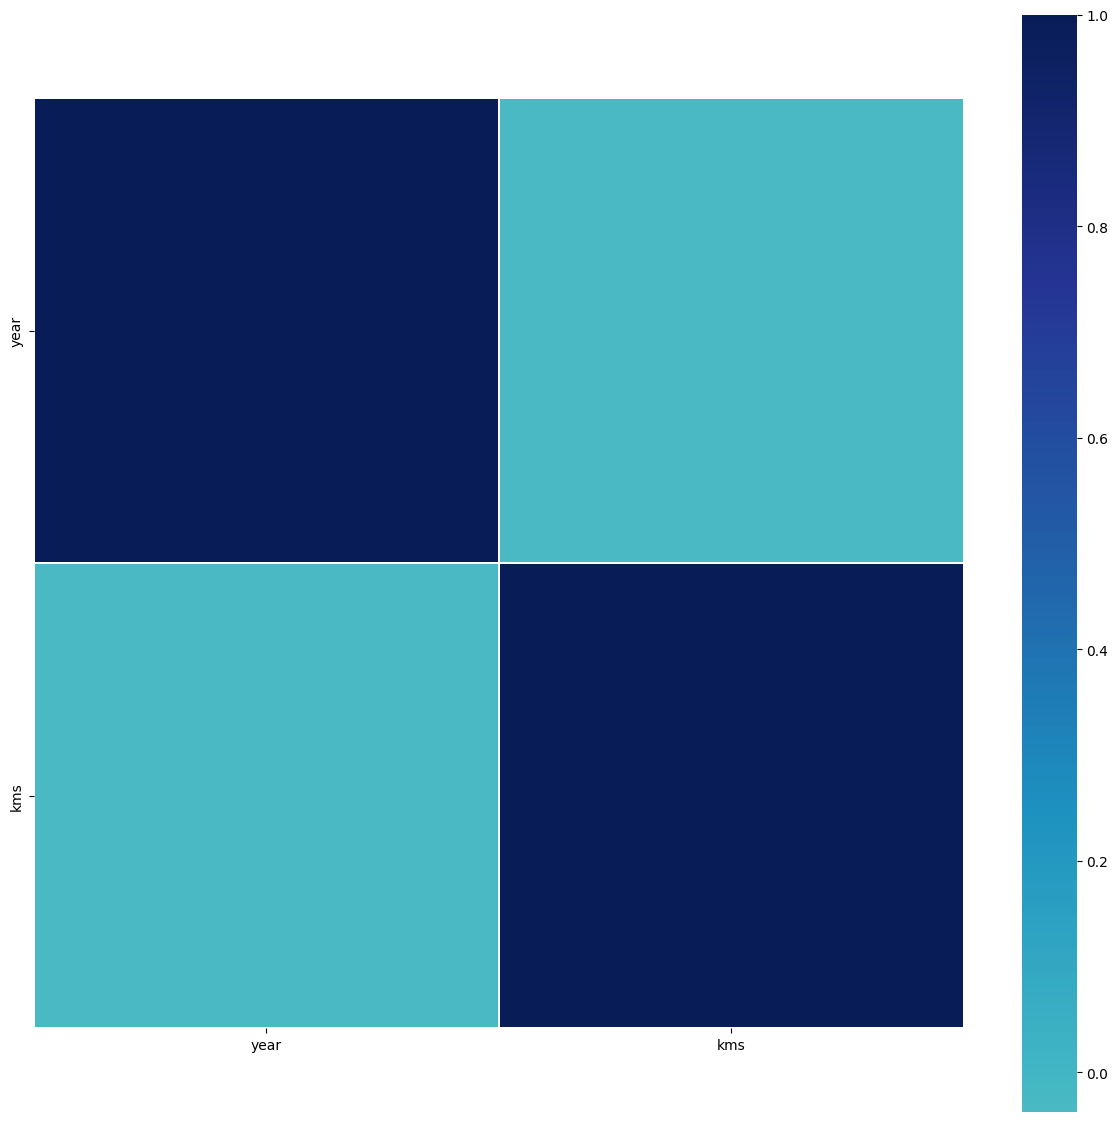

In [22]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

# Use the 'datacc' DataFrame instead of 'X'
correlation_heatmap(datacc[['year', 'kms']]) # Call the function with the correct DataFrame

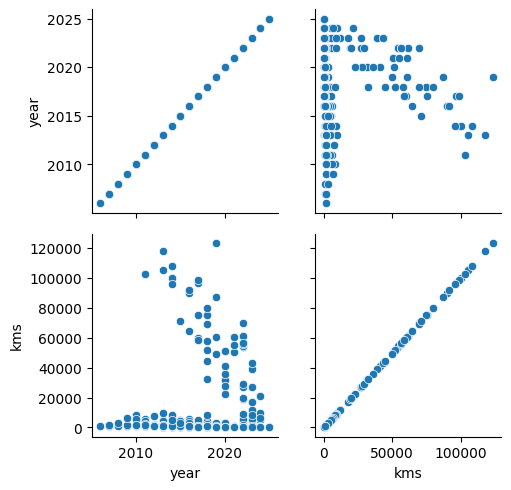

In [23]:
# Assuming 'datacc' is the DataFrame you want to use
g = sns.PairGrid(datacc[['year', 'kms']])
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

### Data partitioning


In [25]:
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(523, 4)
(523,)


In [26]:
# Data set normalization and partitioning
#Normalización de datos, se debe hacer
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(523, 4)

In [27]:
#aca se hace el particionamiento de los datos, aca se tiene el 20 % de los datos apra evaluación
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20,
                                         random_state=42)

### Multivariate lineal regression

In [28]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [29]:
# accuracy check
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 14876786.96
MAE: 9805159.99
R2: 0.53


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 3,
    'learning_rate': 1.510,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 11228274.90
MAE: 6582336.57
R2: 0.76


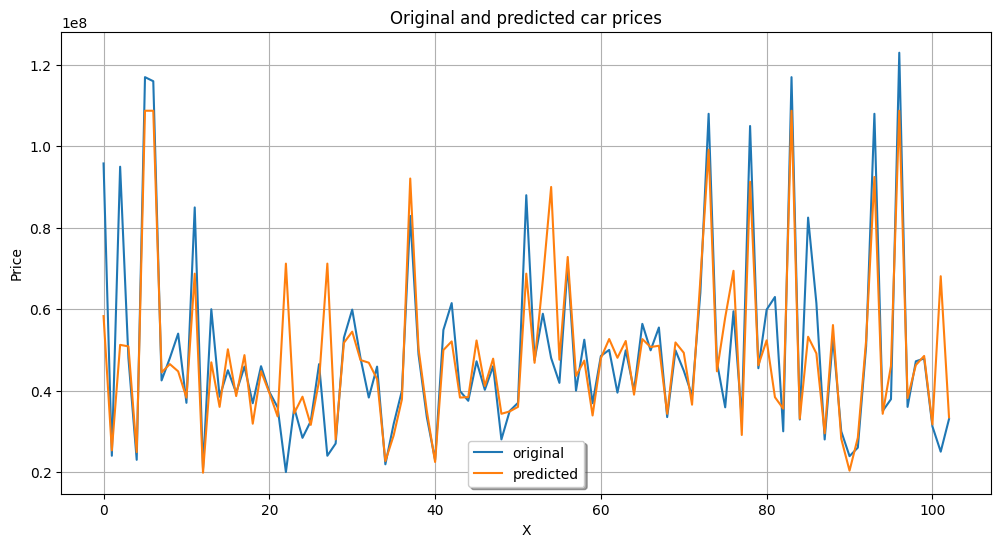

In [ ]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

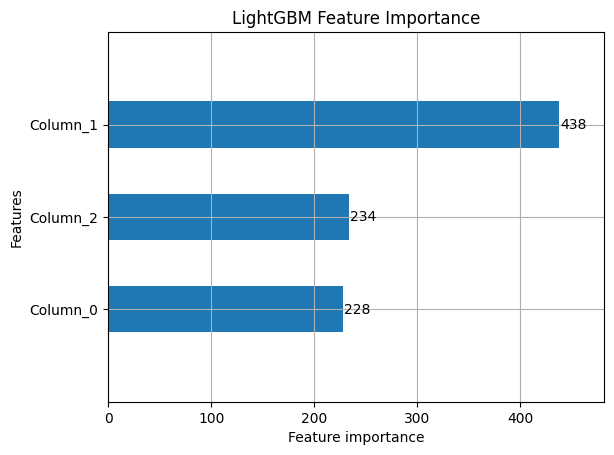

In [ ]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")


<Axes: >

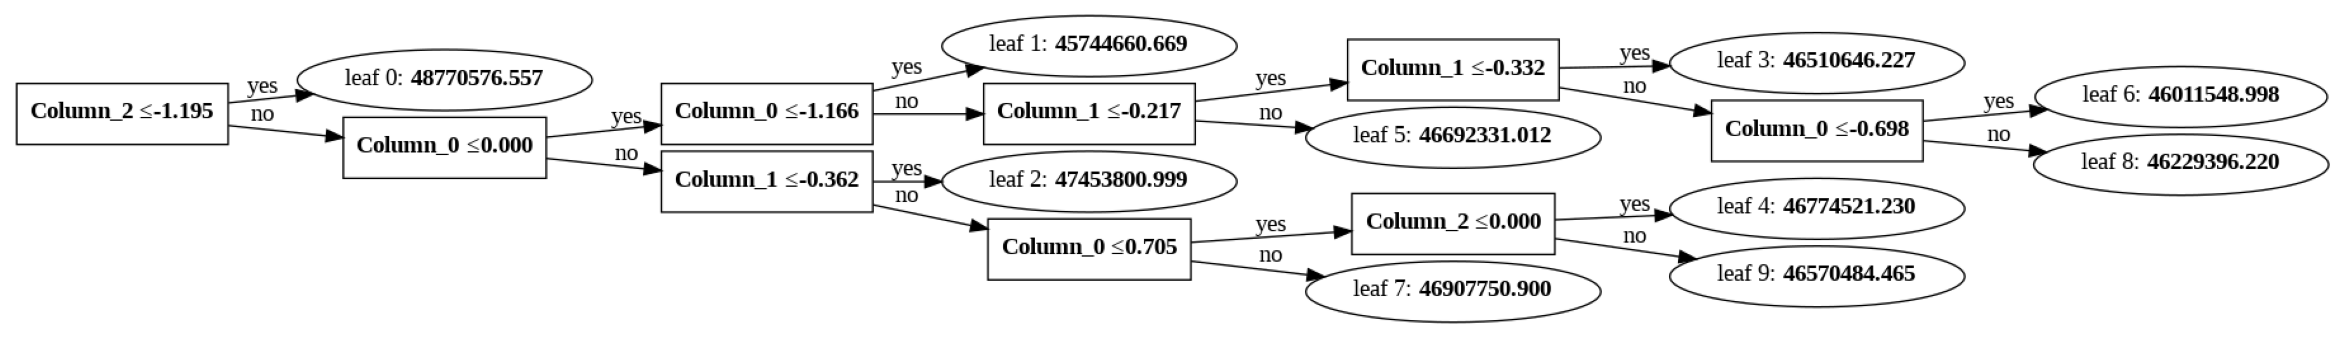

In [ ]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 8993766.98
MAE: 5157716.40
R2: 0.85


**Save the model**

In [ ]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [ ]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.61


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.46


In [ ]:
# Pred
y_pred4 = model4.predict(X_test)

In [ ]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 11535189.22
MAE: 6249334.76
R2: 0.75


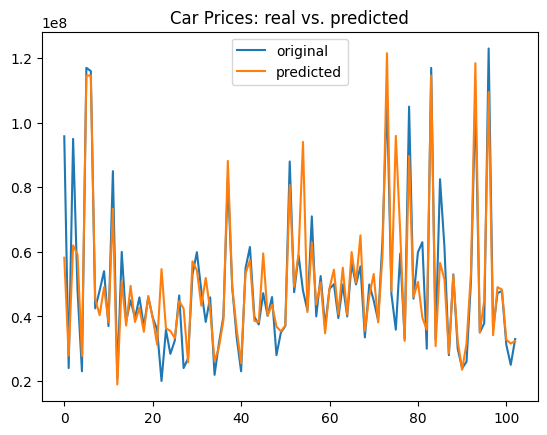

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()